# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    params = []
    result = np.zeros(image.shape, np.uint8)
    image = cv2.bitwise_not(image)
    # image = cv2.GaussianBlur(np.uint8(image),(9,9),0)

    se = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    k = 0
    
    while True:
      if cv2.countNonZero(image)==0:
          break
      eroded = cv2.erode(image, se)
      opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, se)
      subtracted = cv2.subtract(eroded, opened)
      result = cv2.bitwise_or(result, subtracted)
      params.append((k, subtracted))
      image = eroded
      k += 1
        
    result = cv2.bitwise_not(result)
    return result, params

Test your implementation (don't change this cell).

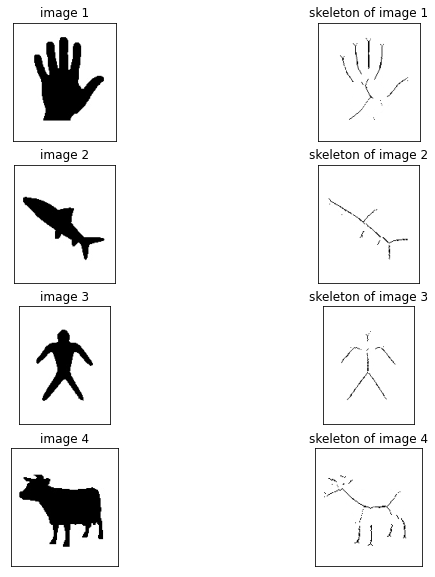

In [ ]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    se = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    result = np.zeros(image.shape, np.uint8)
    
    for i, sk in params:
      img = cv2.dilate(sk, se, iterations = i)
      result = cv2.bitwise_or(result, img)
    
    result = cv2.bitwise_not(result)
      
    return result

Test your implementation (don't change this cell).

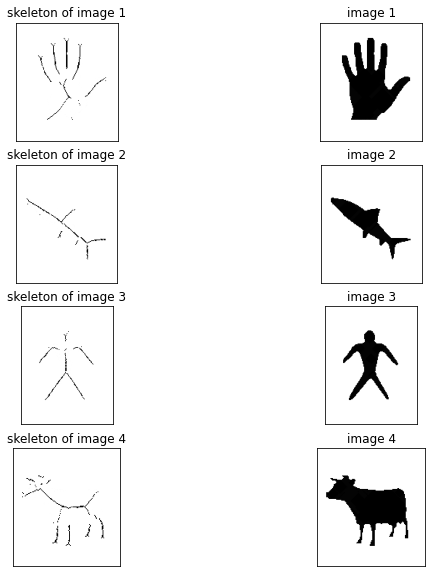

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [ ]:
from google.colab.patches import cv2_imshow
import imutils

Implement this function to detect shapes and number of cars in an input image.

In [ ]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = None
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)[1]

    se1 = cv2.getStructuringElement(cv2.MORPH_RECT,(11,11))
    se2 = cv2.getStructuringElement(cv2.MORPH_RECT,(31,31))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, se1)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se2)
    # cv2_imshow(thresh)
    # cv2_imshow(opened)
    # cv2_imshow(closed)

    cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cars_num = len(cnts)
    print("Number of cars: ", cars_num)

    for c in cnts:
      M = cv2.moments(c)
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
      cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
      cv2.circle(result, (cX, cY), 7, (255, 255, 255), -1)
      cv2.putText(result, "car", (cX - 20, cY - 20),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    return result ,cars_num

Test your implementation (don't change this cell).

Number of cars:  17


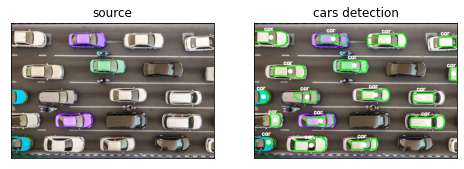

In [ ]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [137]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.blur(gray, (5, 5))

    se = cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9))
    # opened = cv2.morphologyEx(gray_blurred, cv2.MORPH_OPEN, se)
    # closed = cv2.morphologyEx(gray_blurred, cv2.MORPH_CLOSE, se)
    # dilate = cv2.dilate(gray_blurred, se)
    erode = cv2.erode(gray_blurred, se)
    # cv2_imshow(opened)
    # cv2_imshow(closed)
    # cv2_imshow(dilate)
    # cv2_imshow(erode)


    detected_circles = cv2.HoughCircles(erode, 
                      cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                  param2 = 30, minRadius = 10, maxRadius = 51)

    if detected_circles is not None:
      
        detected_circles = np.uint16(np.around(detected_circles))
        flowers_num = len(detected_circles[0])
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            cv2.circle(result, (a, b), r, (0, 255, 0), 2)
            cv2.circle(result, (a, b), 1, (0, 0, 255), 3)
        
    print(flowers_num)

    return result,flowers_num

Test your implementation (don't change this cell).

19


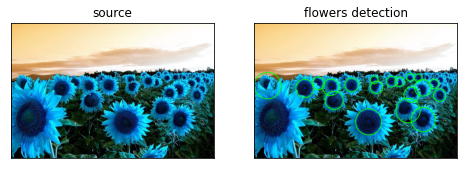

In [138]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!